In [9]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import optimize

In [10]:
a=1
b=0.0001
ne=1.47
nh=a*ne
ue=0.63
uh=b*ue
x=np.linspace(-9,9,100)
y=-16*x*(ne*ue**2/(1+(ue*x)**2)-nh*uh**2/(1+(uh*x)**2))
z= -x/80
t=1/y

Text(0, 0.5, 'rho')

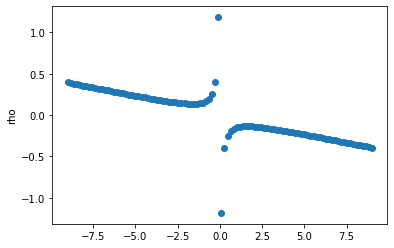

In [11]:
#plt.scatter(x,z)
plt.scatter(x,t)
plt.ylabel('rho')

Text(0, 0.5, '$\\sigma$_xy (1/uOhm-m)')

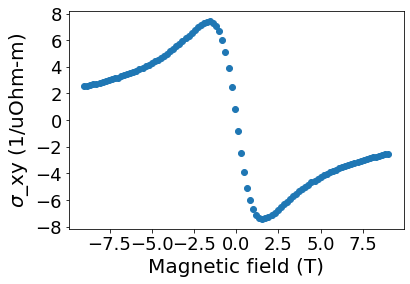

In [12]:
plt.scatter(x, y)
#plt.legend(loc='best',fontsize=20)

#plt.ylim(-8, 8)
#plt.xlim(-9, 9)
#plt.figure(figsize=(6, 6))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylabel('$\sigma$_xy (1/uOhm-m)',fontsize=20)

In [13]:
def test_func(H, ne, ue,nh,uh):
    return  -16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    #(-1.6*10**-19*x*(ne*ue**2/(1+(ue*x)**2))*10**-6)
popt, pcov = optimize.curve_fit(test_func, x, y,p0=[0.01,0,0.01,0],bounds=((0,0,0,0),(10,1,10,1)),maxfev=5000000)
#popt, pcov = optimize.curve_fit(test_func, x, y,maxfev=5000000,bounds=((0,0,0,0),(100,100,100,100)))
perr=np.sqrt(np.diag(pcov))
#calculate r_square

residuals = y- test_func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(popt)
print(perr)
print((ss_res))



[1.47000000e+00 6.30000000e-01 3.66684995e-05 1.26940503e-02]
[1.52837917e-10 4.61949591e-11 3.77759152e-06 6.62286637e-04]
7.246437103866748e-17


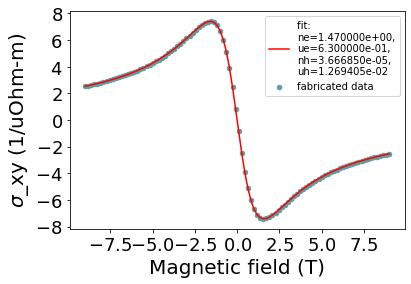

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='fabricated data',color='cadetblue',s=20)
#plt.plot(x, test_func(x, popt[0], popt[1]),label='Fitted function',color='coral',linewidth = 1)
#plt.plot(x, test_func(x, *popt), 'r-', label='fit: n=%e, u=%e' % tuple(popt))
plt.plot(x, test_func(x, *popt), 'r-', label='fit: \nne=%e,\nue=%e,\nnh=%e,\nuh=%e' % tuple(popt))
plt.legend(loc='best')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.autoscale(enable=True, axis='y') 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylabel('$\sigma$_xy (1/uOhm-m)',fontsize=20)
#plt.ylim(-3*10**-9, 3*10**-9)
plt.show()


In [26]:
a=1
b=1.01
ne=1.47
nh=a*ne
ue=0.63
uh=b*ue
x=np.linspace(-9,9,100)
rho_xx=((ne*ue+nh*uh)+(ne*ue*uh**2+nh*ue**2*uh)*x**2)/(16*((ne*ue+nh*uh)**2+(nh-ne)**2*ue**2*uh**2*x**2))
rho_xy=(x*(nh*uh**2-ne*ue**2)+(ue**2*uh**2*(nh-ne)*x**3))/(-16*((ne*ue+nh*uh)**2+(nh-ne)**2*ue**2*uh**2*x**2))
z= -x/80



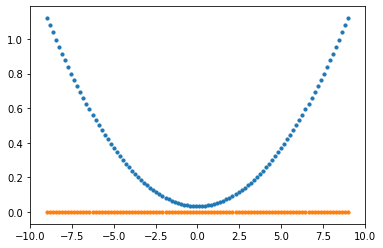

In [32]:
plt.scatter(x,rho_xx,s=10)
plt.scatter(x,rho_xy,s=10)